In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
quants = pd.read_csv('/content/NIFTY50_all.csv')
quants.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


In [ ]:
# download the metadata file containing qualitative data as another dataframe
qual = pd.read_csv('/content/stock_metadata.csv')
qual.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018


In [ ]:
# now let's join the both dataframes on the symbol and series columns
nifty = pd.merge(quants, qual, on = ['Symbol', 'Series'], how = 'inner')
nifty.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
0,2012-01-17,ADANIPORTS,EQ,135.5,137.1,141.00,135.00,140.1,140.00,138.13,1636196.0,2.260074e+13,18374.0,1004327.0,0.6138,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
1,2012-01-18,ADANIPORTS,EQ,140.0,142.0,143.80,138.70,143.0,141.70,141.25,890591.0,1.257986e+13,15615.0,404925.0,0.4547,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
2,2012-01-19,ADANIPORTS,EQ,141.7,144.0,150.55,143.15,149.5,149.40,146.72,1456077.0,2.136382e+13,31299.0,721545.0,0.4955,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
3,2012-01-20,ADANIPORTS,EQ,149.4,151.9,157.60,150.25,155.4,155.40,153.76,1634070.0,2.512583e+13,23335.0,861145.0,0.5270,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
4,2012-01-23,ADANIPORTS,EQ,155.4,155.4,155.40,145.10,146.4,146.75,149.54,1657609.0,2.478768e+13,12400.0,820653.0,0.4951,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042


In [ ]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47776 entries, 0 to 47775
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                47776 non-null  object 
 1   Symbol              47776 non-null  object 
 2   Series              47776 non-null  object 
 3   Prev Close          47776 non-null  float64
 4   Open                47776 non-null  float64
 5   High                47776 non-null  float64
 6   Low                 47776 non-null  float64
 7   Last                47776 non-null  float64
 8   Close               47776 non-null  float64
 9   VWAP                47776 non-null  float64
 10  Volume              47775 non-null  float64
 11  Turnover            47775 non-null  float64
 12  Trades              29315 non-null  float64
 13  Deliverable Volume  44977 non-null  float64
 14  %Deliverble         44977 non-null  float64
 15  Company Name        47776 non-null  object 
 16  Indu

In [ ]:
nifty.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Company Name', 'Industry', 'ISIN Code'],
      dtype='object')

In [ ]:
nifty.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000,47776.000000,4.777500e+04,4.777500e+04,2.931500e+04,4.497700e+04,44977.000000
mean,1236.852969,1238.285210,1256.440897,1219.207641,1237.362034,1237.363119,1238.039194,2.113462e+06,1.410347e+14,5.081566e+04,9.763747e+05,0.521180
std,1400.864381,1402.574712,1420.889741,1383.258792,1401.951061,1401.901015,1402.363276,5.333814e+06,3.284478e+14,6.298252e+04,2.384587e+06,0.185199
min,21.550000,21.050000,22.650000,21.000000,21.600000,21.550000,21.950000,2.500000e+01,1.081715e+09,2.100000e+01,2.500000e+01,0.027900
25%,370.800000,371.000000,377.037500,365.000000,371.000000,370.850000,371.355000,1.008715e+05,1.030181e+13,1.695250e+04,6.808500e+04,0.389900
50%,667.125000,667.425000,678.950000,656.225000,667.750000,667.200000,667.575000,5.766460e+05,5.479885e+13,3.435600e+04,2.981840e+05,0.522600
75%,1513.075000,1515.012500,1540.000000,1490.000000,1512.650000,1513.812500,1515.595000,2.152629e+06,1.422338e+14,6.129900e+04,1.029274e+06,0.646400
max,11393.300000,11300.000000,11770.000000,11294.000000,11386.700000,11393.300000,11490.730000,4.797162e+08,1.570040e+16,1.205984e+06,1.875849e+08,1.000000


In [ ]:
# check null values

nifty.isnull().sum()

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    1
Turnover                  1
Trades                18461
Deliverable Volume     2799
%Deliverble            2799
Company Name              0
Industry                  0
ISIN Code                 0
dtype: int64

In [ ]:
# if the variable has data of type int, float or complex numbers then we will fill the null values with the mean of that column
nifty.fillna(value = 0.0, inplace = True)
nifty.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Company Name          0
Industry              0
ISIN Code             0
dtype: int64

In [ ]:
# convert date column to date datatype
nifty['Date'] = pd.to_datetime(nifty['Date'])
print(nifty['Date'].dtype)

datetime64[ns]


In [ ]:
# overall ranking by grouping the symbol and calculating the average of volume and traders
overall_ranking = nifty.groupby('Company Name').agg({'Volume':'mean', 'Trades':'mean'}).sort_values(by = 'Trades', ascending = False)
top_company_volume = overall_ranking['Volume'].idxmax()
top_company_trade = overall_ranking['Trades'].idxmax()
print(f'The top company by volume is {top_company_volume} and the top company by trade is {top_company_trade}')

The top company by volume is Axis Bank Ltd. and the top company by trade is Axis Bank Ltd.


In [ ]:
company_ranks_trades = nifty.groupby('Company Name').agg({'Volume':'mean', 'Trades':'mean'}).rank(ascending = False)
company_ranks_trades = company_ranks_trades.sort_values(by = 'Trades')
company_ranks_trades.head()

,Volume,Trades
Company Name,,
Axis Bank Ltd.,1.0,1.0
Bharti Airtel Ltd.,2.0,2.0
Bajaj Finance Ltd.,7.0,3.0
Coal India Ltd.,3.0,4.0
Adani Ports and Special Economic Zone Ltd.,4.0,5.0


 The top 5 companies by overall ranking are 
                                 Company Name        Volume        Trades
0                              Axis Bank Ltd.  6.916522e+06  87271.385091
1                          Bharti Airtel Ltd.  6.424966e+06  56740.178290
2                          Bajaj Finance Ltd.  1.201285e+06  52810.646723
3                             Coal India Ltd.  5.617118e+06  50570.002694
4  Adani Ports and Special Economic Zone Ltd.  3.909287e+06  47114.489778


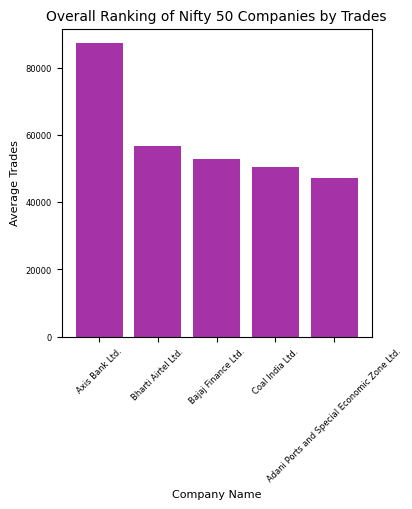

In [ ]:
# top 5 companies by overall ranking
top_5_companies_trades = overall_ranking.head(5).reset_index()
print(f' The top 5 companies by overall ranking are \n{top_5_companies_trades}')

# plot a graph for the top 5 companies
plt.figure(figsize = (4,4))
plt.bar(x = top_5_companies_trades['Company Name'], height = top_5_companies_trades['Trades'], color = '#a632a8')
plt.xlabel('Company Name', fontsize = 8)
plt.ylabel('Average Trades', fontsize = 8)
plt.xticks(fontsize = 6, rotation = 45)
plt.yticks(fontsize = 6)
plt.title('Overall Ranking of Nifty 50 Companies by Trades', fontsize = 10)
plt.show()

In [ ]:
# top 5 industries by mean volume and trades

top_industry = nifty.groupby('Industry').agg({'Volume':'mean', 'Trades':'mean'})

# top 5 industries by mean volume
top_industry_volume = top_industry['Volume'].sort_values(ascending = False).head().to_frame().reset_index()
print(f'The top 5 industries by Average Volume are: \n{top_industry_volume}')

# top 5 industries by mean trades
top_industry_trades = top_industry['Trades'].sort_values(ascending = False).head().to_frame().reset_index()
print(f'The top 5 industries by Average Trades are: \n{top_industry_trades}')

The top 5 industries by Average Volume are: 
             Industry        Volume
0             TELECOM  6.424966e+06
1              METALS  5.617118e+06
2            SERVICES  3.909287e+06
3  FINANCIAL SERVICES  2.968649e+06
4              ENERGY  2.093650e+06
The top 5 industries by Average Trades are: 
             Industry        Trades
0             TELECOM  56740.178290
1  FINANCIAL SERVICES  52726.647359
2              METALS  50570.002694
3            SERVICES  47114.489778
4              ENERGY  25793.814926


<ipython-input-17-5eec0e70343d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_industry_volume, y='Industry', x='Volume', palette='viridis')


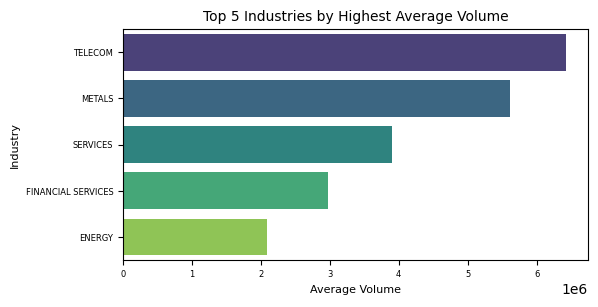

In [ ]:
# plot top 5 industries by average volume

plt.figure(figsize=(6, 3))
sns.barplot(data=top_industry_volume, y='Industry', x='Volume', palette='viridis')
plt.xlabel('Average Volume', fontsize = 8)
plt.ylabel('Industry', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Industries by Highest Average Volume', fontsize = 10)
plt.show()

<ipython-input-18-2913fd57c1ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_industry_trades, y = 'Industry', x = 'Trades', palette='viridis')


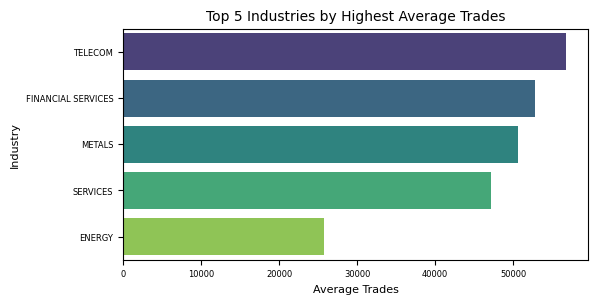

In [ ]:
# plot top 5 industries by average trades

plt.figure(figsize=(6, 3))
sns.barplot(data=top_industry_trades, y = 'Industry', x = 'Trades', palette='viridis')
plt.xlabel('Average Trades', fontsize = 8)
plt.ylabel('Industry', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Industries by Highest Average Trades', fontsize = 10)
plt.show()

In [ ]:
# top 5 traders by mean volume and trades

top_traders = nifty.groupby('Symbol').agg({'Volume':'mean', 'Trades':'mean'})

# top 5 traders by mean volume
top_traders_volume = top_traders['Volume'].sort_values(ascending = False).head().reset_index()
print(f'The top 5 traders by Average Volume are: \n{top_traders_volume}')

# top 5 traders by mean trades
top_traders_trades = top_traders['Trades'].sort_values(ascending = False).head().reset_index()
print(f'The top 5 traders by Average Trades are: \n{top_traders_trades}')

The top 5 traders by Average Volume are: 
       Symbol        Volume
0    AXISBANK  6.916522e+06
1  BHARTIARTL  6.424966e+06
2   COALINDIA  5.617118e+06
3  ADANIPORTS  3.909287e+06
4        BPCL  2.093650e+06
The top 5 traders by Average Trades are: 
       Symbol        Trades
0    AXISBANK  87271.385091
1  BHARTIARTL  56740.178290
2  BAJFINANCE  52810.646723
3   COALINDIA  50570.002694
4  ADANIPORTS  47114.489778


<ipython-input-20-029d919827c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_traders_volume, y='Symbol', x='Volume', palette='magma')


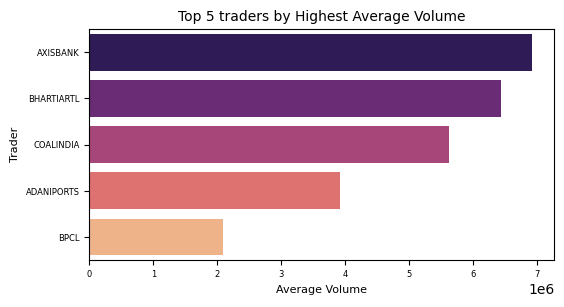

In [ ]:
# plot top 5 traders by average volume

plt.figure(figsize=(6, 3))
sns.barplot(data=top_traders_volume, y='Symbol', x='Volume', palette='magma')
plt.xlabel('Average Volume', fontsize = 8)
plt.ylabel('Trader', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 traders by Highest Average Volume', fontsize = 10)
plt.show()

<ipython-input-21-8e1490020e3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_traders_trades, y='Symbol', x='Trades', palette='magma')


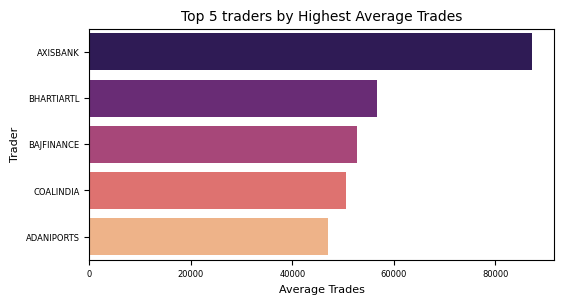

In [ ]:
# plot top 5 traders by average trades

plt.figure(figsize=(6, 3))
sns.barplot(data=top_traders_trades, y='Symbol', x='Trades', palette='magma')
plt.xlabel('Average Trades', fontsize = 8)
plt.ylabel('Trader', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 traders by Highest Average Trades', fontsize = 10)
plt.show()

In [ ]:
# calculate the mean and sum of trades for each group of trader
trading_since_inception = nifty.groupby('Symbol').agg({'Trades':['mean', 'sum']}).sort_values(by = ('Trades', 'sum'), ascending = False).reset_index().head(5)
print(f'The top 5 most trading stocks since inception are: \n{trading_since_inception}')

The top 5 most trading stocks since inception are: 
       Symbol        Trades             
                       mean          sum
0    AXISBANK  87271.385091  296199081.0
1  BHARTIARTL  56740.178290  209087557.0
2  BAJFINANCE  52810.646723  138575137.0
3        BPCL  25793.814926  136861982.0
4   COALINDIA  50570.002694  131380867.0


<ipython-input-23-df037220a1e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trading_since_inception, y='Symbol', x= ('Trades', 'sum'), palette='Set1')


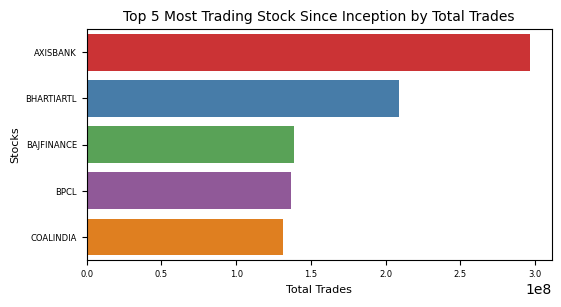

In [ ]:
# plot the top 5 most trading stocks since inception

plt.figure(figsize=(6, 3))
sns.barplot(data=trading_since_inception, y='Symbol', x= ('Trades', 'sum'), palette='Set1')
plt.xlabel('Total Trades', fontsize = 8)
plt.ylabel('Stocks', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Most Trading Stock Since Inception by Total Trades', fontsize = 10)
plt.show()

In [ ]:
# calculate the first and last closing price of stock grouped by company name
price_inception = nifty.groupby('Company Name').agg({'Close':['first','last']})

# Calculate the percentage change using the equation [X(final) - X(initial)] / X(initial) * 100.
price_inception['Delta Price'] = ((price_inception['Close']['last'] - price_inception['Close']['first'])/price_inception['Close']['first'])*100

# top 5 best stocks by delta price
best_stocks = price_inception.sort_values(by ='Delta Price', ascending = False).head(5).reset_index()
print(f'The top 5 best stocks by delta price are: \n{best_stocks}')


The top 5 best stocks by delta price are: 
                                 Company Name   Close            Delta Price
                                                first      last             
0                          Bajaj Finserv Ltd.  509.10  11041.65  2068.856806
1                          Bajaj Finance Ltd.  774.60   5451.90   603.834237
2                           Asian Paints Ltd.  381.65   2536.40   564.587973
3                             Bajaj Auto Ltd.  604.75   3833.75   533.939644
4  Adani Ports and Special Economic Zone Ltd.  140.00    730.05   421.464286


<ipython-input-25-dfa87b4084e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = best_stocks, y='Company Name', x= 'Delta Price', palette='Set2')


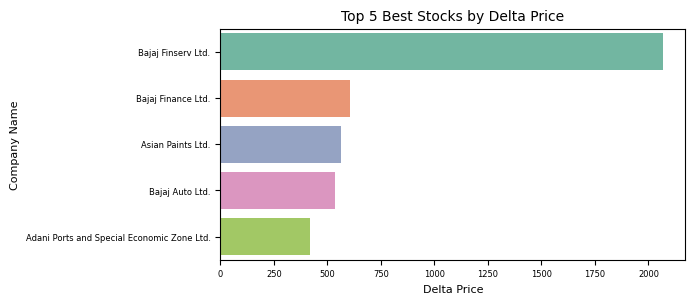

In [ ]:
# plot the top 5 best stocks as per delta price %

plt.figure(figsize=(6, 3))
sns.barplot(data = best_stocks, y='Company Name', x= 'Delta Price', palette='Set2')
plt.xlabel('Delta Price', fontsize = 8)
plt.ylabel('Company Name', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Best Stocks by Delta Price', fontsize = 10)
plt.show()

In [ ]:
# top 5 worst stocks by delta price
worst_stocks = price_inception.sort_values(by ='Delta Price').head(5).reset_index()
print(f'The top 5 worst stocks by delta price are: \n{worst_stocks}')

The top 5 worst stocks by delta price are: 
                        Company Name    Close         Delta Price
                                        first    last            
0                    Coal India Ltd.   342.55  133.05  -61.158955
1                 Eicher Motors Ltd.    48.85   26.50  -45.752303
2                         Cipla Ltd.  1457.35  910.35  -37.533880
3  Bharat Petroleum Corporation Ltd.   399.25  421.80    5.648090
4                     Axis Bank Ltd.   557.85  714.90   28.152729


<ipython-input-27-0cc47458dd4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = worst_stocks, y='Company Name', x= 'Delta Price', palette='Set3')


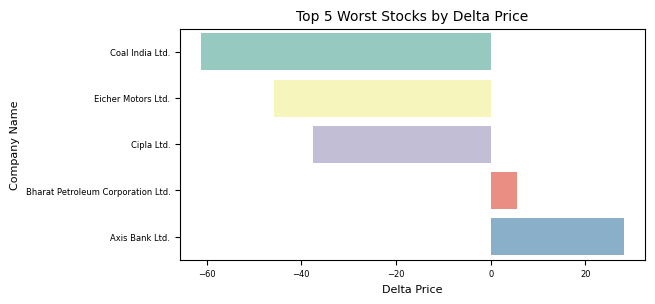

In [ ]:
# plot the top 5 worst stocks as per delta price %

plt.figure(figsize=(6, 3))
sns.barplot(data = worst_stocks, y='Company Name', x= 'Delta Price', palette='Set3')
plt.xlabel('Delta Price', fontsize = 8)
plt.ylabel('Company Name', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Worst Stocks by Delta Price', fontsize = 10)
plt.show()

The top 5 stocks with least coeffient of variation are: 
       Symbol     Close
0   COALINDIA  0.257488
1   EICHERMOT  0.314567
2  BAJAJ-AUTO  0.353858
3  BHARTIARTL  0.400638
4  ADANIPORTS  0.407523
5        BPCL  0.414824
6    AXISBANK  0.430713
7       CIPLA  0.535048
8     DRREDDY  0.598303
9  BAJFINANCE  0.747161


<ipython-input-28-3a7107511356>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = coeff_var_low, y='Symbol', x= 'Close', palette='husl')


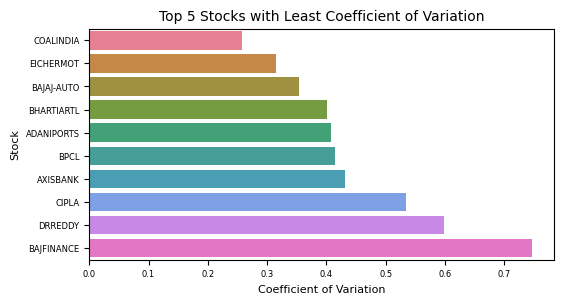

In [ ]:
# calculate standard deviation for each stock
standard_deviation = nifty.groupby('Symbol')['Close'].std()

# calculate mean for each stock
mean_close_price = nifty.groupby('Symbol')['Close'].mean()

# calculate coefficient of variation  (CV=standard deviation/mean)
coeff_var = standard_deviation/mean_close_price
coeff_var_low = coeff_var.sort_values().head(10).reset_index()
print(f'The top 5 stocks with least coeffient of variation are: \n{coeff_var_low}')
# plot the top 10 stocks with least coefficient of variation

plt.figure(figsize=(6, 3))
sns.barplot(data = coeff_var_low, y='Symbol', x= 'Close', palette='husl')
plt.xlabel('Coefficient of Variation', fontsize = 8)
plt.ylabel('Stock', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Stocks with Least Coefficient of Variation', fontsize = 10)
plt.show()

The top 5 stocks with highest coeffient of variation are: 
       Symbol     Close
0  BAJAJFINSV  1.041638
1  ASIANPAINT  0.861365
2   BRITANNIA  0.808403
3  BAJFINANCE  0.747161
4     DRREDDY  0.598303
5       CIPLA  0.535048
6    AXISBANK  0.430713
7        BPCL  0.414824
8  ADANIPORTS  0.407523
9  BHARTIARTL  0.400638


<ipython-input-29-1e0e42f0b061>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = coeff_var_high, y='Symbol', x= 'Close', palette='dark')


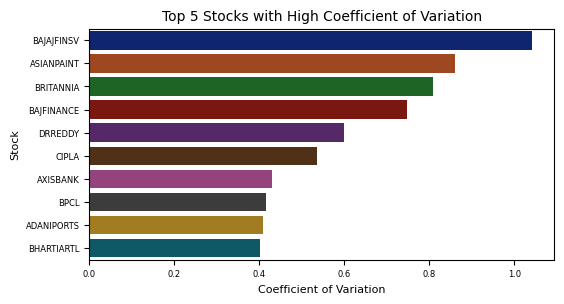

In [ ]:
coeff_var_high = coeff_var.sort_values(ascending = False).head(10).reset_index()
print(f'The top 5 stocks with highest coeffient of variation are: \n{coeff_var_high}')
# plot the top 10 stocks with least coefficient of variation

plt.figure(figsize=(6, 3))
sns.barplot(data = coeff_var_high, y='Symbol', x= 'Close', palette='dark')
plt.xlabel('Coefficient of Variation', fontsize = 8)
plt.ylabel('Stock', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Stocks with High Coefficient of Variation', fontsize = 10)
plt.show()